# Software Development for A.I.
Project Increment - 1


---


Title: **Health Insurance Premium Prediction using AWS Cloud**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Important Libraries**



1.   Numpy
* NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

2.   Pandas

* Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series

3. Seaborn

* Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

4. scikit-learn

* Scikit-learn is an open source data analysis library, and the gold standard for Machine Learning (ML) in the Python ecosystem

In [ ]:
#Importing the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the Dataset 
insurance = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [ ]:
# Quick glance at the data
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


#Performing Exploratory Data Analysis

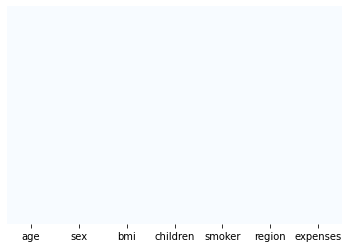

In [ ]:
#Checking for null values in the Dataset
sns.heatmap(insurance.isnull(), yticklabels = False, cbar = False, cmap="Blues") 

In [ ]:
# Grouping by region to see any relationship between region and charges
region = insurance.groupby(by='region').mean()
region
# It reveals that the south east region has higher BMI values when compared to northeast

,age,bmi,children,expenses
region,,,,
northeast,39.268519,29.176235,1.046296,13406.384691
northwest,39.196923,29.201846,1.147692,12417.575169
southeast,38.939560,33.359341,1.049451,14735.411538
southwest,39.455385,30.596615,1.141538,12346.937908


In [ ]:
# Grouping by age
age = insurance.groupby(by='age').mean() 
age

,bmi,children,expenses
age,,,
18,31.333333,0.449275,7086.217971
19,28.598529,0.426471,9747.909706
20,30.627586,0.862069,10159.697931
21,28.189286,0.785714,4730.464286
22,31.092857,0.714286,10012.932857
23,31.460714,1.000000,12419.820357
24,29.142857,0.464286,10648.015714
25,29.689286,1.285714,9838.365000
26,29.435714,1.071429,6133.825714


In [ ]:
# Conversion of categorical value to numerical value to avoid training issues with the machine learning model
insurance['sex'] = insurance['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance['smoker'] = insurance['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
# Check unique values in 'region' column
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
region_dummies = pd.get_dummies(insurance['region'], drop_first = True)

In [ ]:
insurance = pd.concat([insurance, region_dummies], axis = 1)

In [ ]:
insurance.describe()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,13270.422414,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098382,1.205493,0.403694,12110.011240,0.428995,0.445181,0.428995
min,18.000000,0.000000,16.000000,0.000000,0.000000,1121.870000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,4740.287500,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.030000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16639.915000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.100000,5.000000,1.000000,63770.430000,1.000000,1.000000,1.000000


## Plotting the Dataset graph using Seaborn

1. Graphs showing the overview of aspects like Age, Sex, BMI, Children, Smoker, Expenses

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef94cad10>,
      dtype=object)

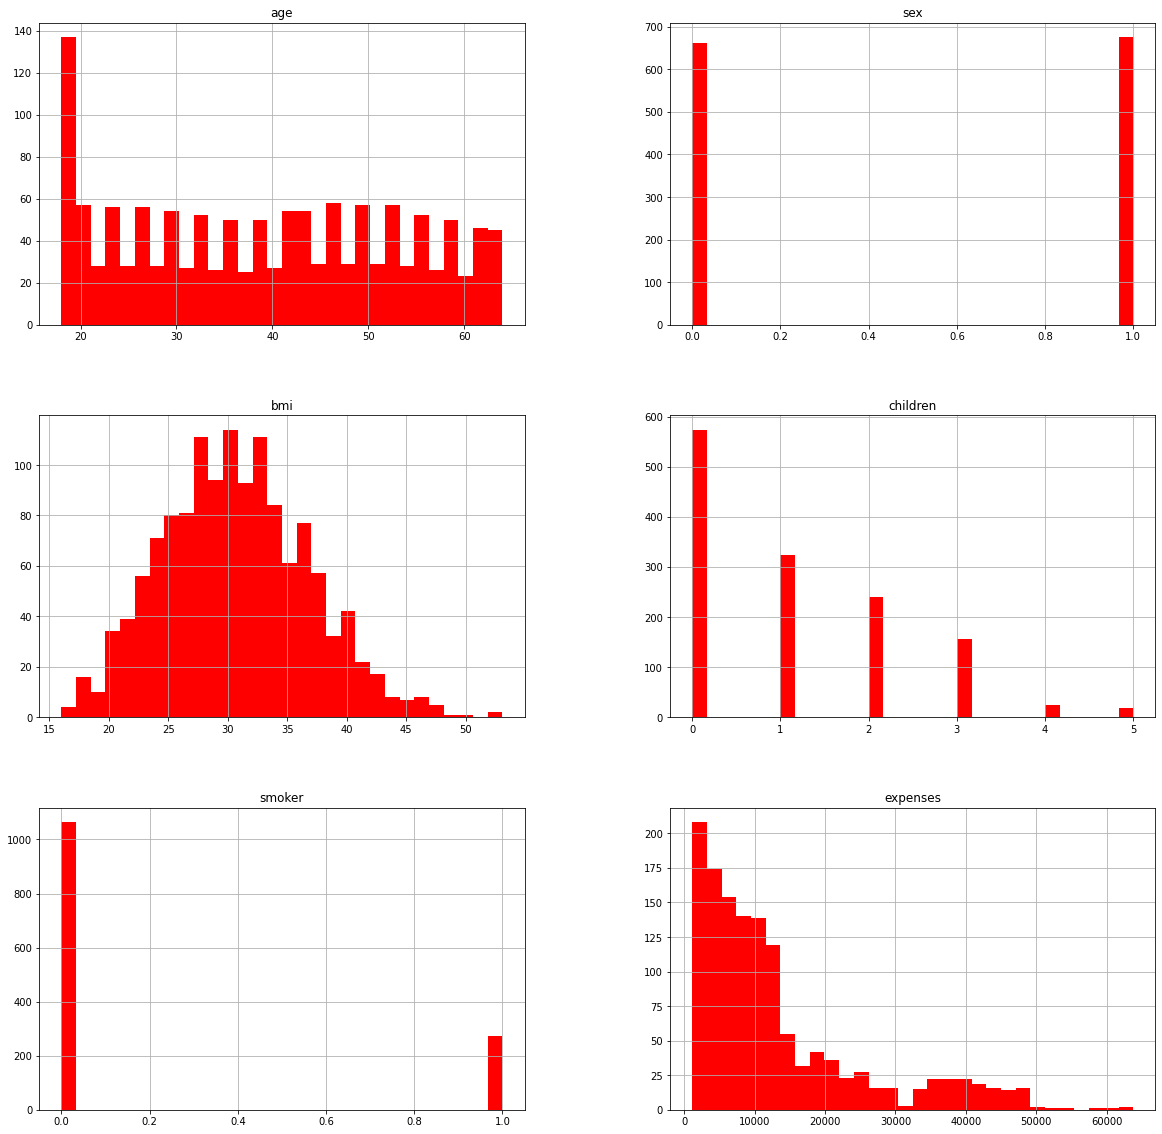

In [ ]:
insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'expenses']].hist(bins = 30, figsize = (20,20), color = 'r')

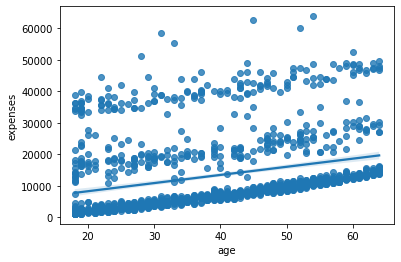

In [ ]:
# Plotting age and expenses
sns.regplot(x = 'age', y = 'expenses', data = insurance)
plt.show()

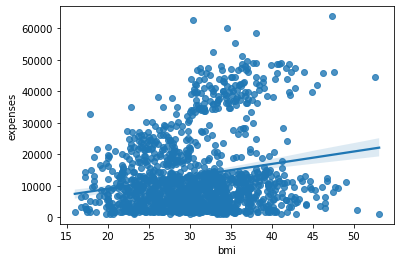

In [ ]:
# Plotting BMI and expenses
sns.regplot(x = 'bmi', y = 'expenses', data = insurance)
plt.show()

In [ ]:
# Finding the corealation among them
corelation = insurance.corr()
corelation

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576,-0.135992,0.270144,-0.006398
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135992,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270144,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006398,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


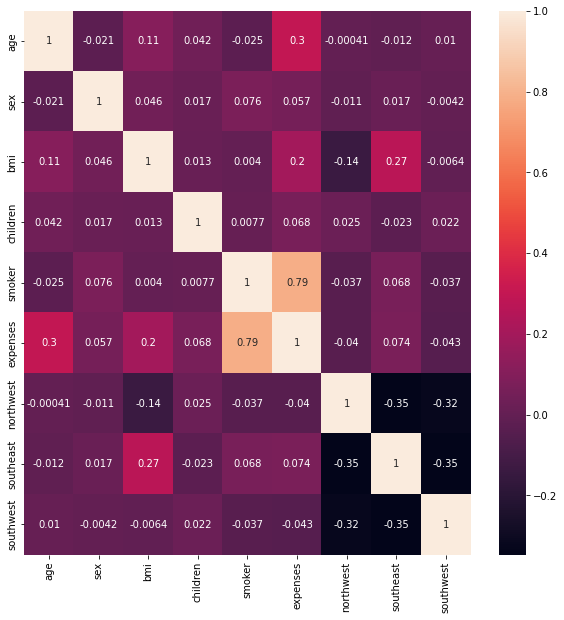

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corelation , annot = True)

In [ ]:
#Dropping Region coloumn
insurance.drop(['region'], axis = 1, inplace = True)